In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from matplotlib import animation, rc
rc('animation', html='jshtml')
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.linalg import norm
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.integrate import odeint
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')
from pathlib import Path

plt.rcParams['figure.figsize'] = (15,10)
plt.rc("axes", labelsize=18)
plt.rc("xtick", labelsize=16, top=True, direction="in")
plt.rc("ytick", labelsize=16, right=True, direction="in")
plt.rc("axes", titlesize=22)
plt.rc("legend", fontsize=16, loc="upper left")
plt.rc("figure", figsize=(10, 7))

sns.set_style("darkgrid")
sns.set_context("paper")
sns.set(font_scale=1.4)
mycolors = ['#C188F7','#F79288','#7FB806','#F59B18']
sns.set_palette("Set2") 

# $R_0$ på 3

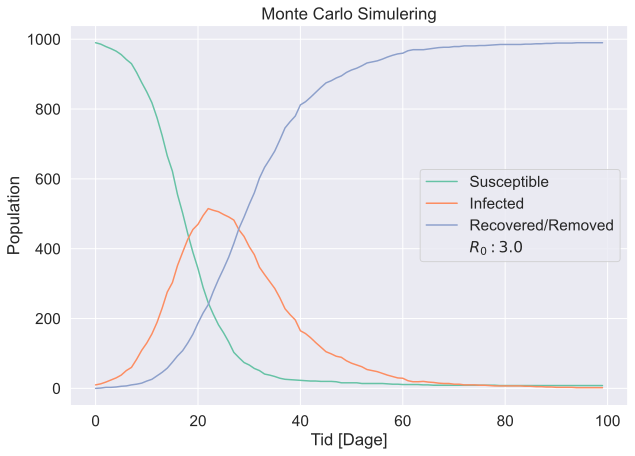

In [6]:
N = 1000
beta = 0.3
gamma = 0.1
R0 = beta/gamma

befolkning = []

# rask, smittet, immun

DAGE_FØR_SMITTE = 3

for i in range(N):
    start = [DAGE_FØR_SMITTE,0,0]
    befolkning.append(start)
for i in range(10):
    befolkning.append([0,1,0]) # Tilføjer vi en person der er smittet, og er klar til at smitte

dage = 100

S_arr = []
I_arr = []
R_arr = []

def find_stats():
    I = 0
    R = 0
    E = 0
    
    for person in befolkning:
        if person[1] == 1: # Syg
            I+=1
        if not person[0] == 0 and person[1] == 1: #Syg men ikke klar til at smitte
            E+=1
            
        if person[2] == 1: # Immun / Død
            R+=1
    
    S = N-I-R

    return [S,I,R,E]

for dag in range(dage):
        
    S,I,R,E = find_stats()
    
    S_arr.append(S)
    I_arr.append(I)
    R_arr.append(R)
    
    for person_id in range(len(befolkning)):
        
        person = befolkning[person_id]
        
        if person[1]==1:
            if person[0] == 0:
                rand = np.random.uniform()
                if rand < gamma: # Hvis mindre end gamma, så helbred denne person
                    befolkning[person_id][2] = 1
                    befolkning[person_id][1] = 0
            else:
                befolkning[person_id][0]-= 1
        
        if person[1]==0 and person[2] == 0: #Om personen er hverken smittede eller immun
            rand = np.random.uniform()
            if rand < beta*I/N:                
                befolkning[person_id][1] = 1

                
plt.plot(range(dage), S_arr, label="Susceptible")
plt.plot(range(dage), I_arr, label="Infected")
plt.plot(range(dage), R_arr, label="Recovered/Removed")
plt.plot([], [], ' ', label=r"$R_0:%1.1f$"%R0)

plt.legend(loc='best')
plt.xlabel("Tid [Dage]")
plt.ylabel("Population")
plt.title("Monte Carlo Simulering")

display = False
plt.savefig(fn, bbox_inches='tight')

# $R_0$ på 1.5

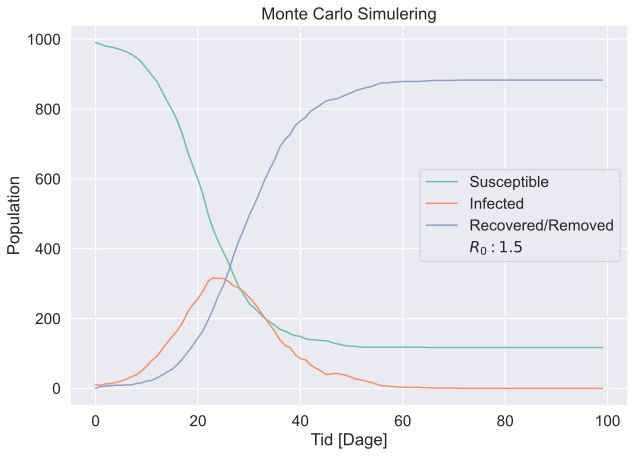

In [8]:
N = 1000
beta = 0.3
gamma = 0.2
R0 = beta/gamma

befolkning = []

# rask, smittet, immun

DAGE_FØR_SMITTE = 3

for i in range(N):
    start = [DAGE_FØR_SMITTE,0,0]
    befolkning.append(start)
for i in range(10):
    befolkning.append([0,1,0]) # Tilføjer vi en person der er smittet, og er klar til at smitte

dage = 100

S_arr = []
I_arr = []
R_arr = []

def find_stats():
    I = 0
    R = 0
    E = 0
    
    for person in befolkning:
        if person[1] == 1: # Syg
            I+=1
        if not person[0] == 0 and person[1] == 1: #Syg men ikke klar til at smitte
            E+=1
            
        if person[2] == 1: # Immun / Død
            R+=1
    
    S = N-I-R

    return [S,I,R,E]

for dag in range(dage):
        
    S,I,R,E = find_stats()
    
    S_arr.append(S)
    I_arr.append(I)
    R_arr.append(R)
    
    for person_id in range(len(befolkning)):
        
        person = befolkning[person_id]
        
        if person[1]==1:
            if person[0] == 0:
                rand = np.random.uniform()
                if rand < gamma: # Hvis mindre end gamma, så helbred denne person
                    befolkning[person_id][2] = 1
                    befolkning[person_id][1] = 0
            else:
                befolkning[person_id][0]-= 1
        
        if person[1]==0 and person[2] == 0: #Om personen er hverken smittede eller immun
            rand = np.random.uniform()
            if rand < beta*I/N:                
                befolkning[person_id][1] = 1

                
plt.plot(range(dage), S_arr, label="Susceptible")
plt.plot(range(dage), I_arr, label="Infected")
plt.plot(range(dage), R_arr, label="Recovered/Removed")
plt.plot([], [], ' ', label=r"$R_0:%1.1f$"%R0)

plt.legend(loc='best')
plt.xlabel("Tid [Dage]")
plt.ylabel("Population")
plt.title("Monte Carlo Simulering")

display = False
plt.savefig(fn, bbox_inches='tight')

# $R_0$ på 1.2

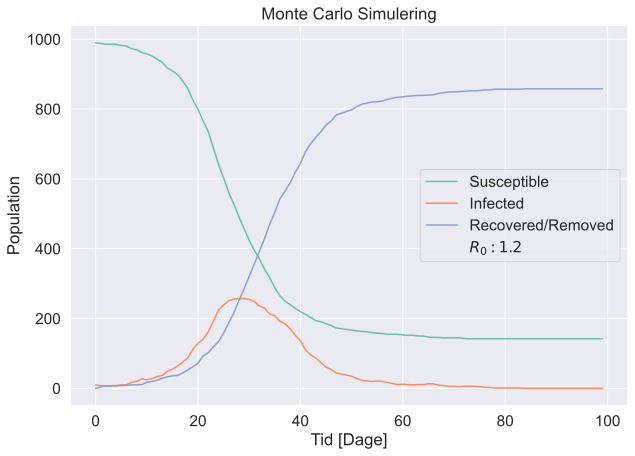

In [10]:
N = 1000
beta = 0.3
gamma = 0.25
R0 = beta/gamma

befolkning = []

# rask, smittet, immun

DAGE_FØR_SMITTE = 3

for i in range(N):
    start = [DAGE_FØR_SMITTE,0,0]
    befolkning.append(start)
for i in range(10):
    befolkning.append([0,1,0]) # Tilføjer vi en person der er smittet, og er klar til at smitte

dage = 100

S_arr = []
I_arr = []
R_arr = []

def find_stats():
    I = 0
    R = 0
    E = 0
    
    for person in befolkning:
        if person[1] == 1: # Syg
            I+=1
        if not person[0] == 0 and person[1] == 1: #Syg men ikke klar til at smitte
            E+=1
            
        if person[2] == 1: # Immun / Død
            R+=1
    
    S = N-I-R

    return [S,I,R,E]

for dag in range(dage):
        
    S,I,R,E = find_stats()
    
    S_arr.append(S)
    I_arr.append(I)
    R_arr.append(R)
    
    for person_id in range(len(befolkning)):
        
        person = befolkning[person_id]
        
        if person[1]==1:
            if person[0] == 0:
                rand = np.random.uniform()
                if rand < gamma: # Hvis mindre end gamma, så helbred denne person
                    befolkning[person_id][2] = 1
                    befolkning[person_id][1] = 0
            else:
                befolkning[person_id][0]-= 1
        
        if person[1]==0 and person[2] == 0: #Om personen er hverken smittede eller immun
            rand = np.random.uniform()
            if rand < beta*I/N:                
                befolkning[person_id][1] = 1

                
plt.plot(range(dage), S_arr, label="Susceptible")
plt.plot(range(dage), I_arr, label="Infected")
plt.plot(range(dage), R_arr, label="Recovered/Removed")
plt.plot([], [], ' ', label=r"$R_0:%1.1f$"%R0)

plt.legend(loc='best')
plt.xlabel("Tid [Dage]")
plt.ylabel("Population")
plt.title("Monte Carlo Simulering")

display = False
plt.savefig(fn, bbox_inches='tight')

# $R_0$ på 0.9

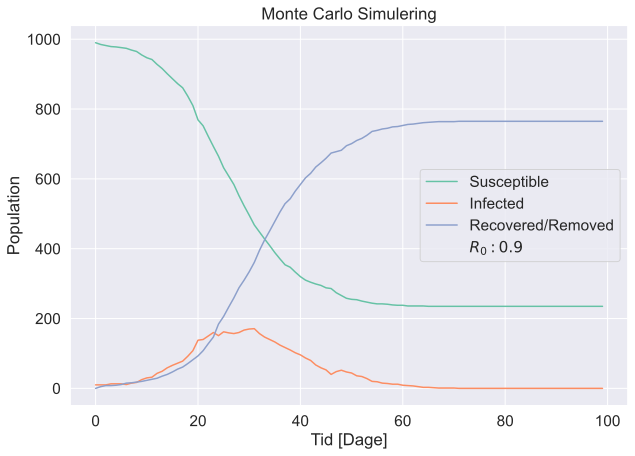

In [12]:
N = 1000
beta = 0.3
gamma = 0.33
R0 = beta/gamma

befolkning = []

# rask, smittet, immun

DAGE_FØR_SMITTE = 3

for i in range(N):
    start = [DAGE_FØR_SMITTE,0,0]
    befolkning.append(start)
for i in range(10):
    befolkning.append([0,1,0]) # Tilføjer vi en person der er smittet, og er klar til at smitte

dage = 100

S_arr = []
I_arr = []
R_arr = []

def find_stats():
    I = 0
    R = 0
    E = 0
    
    for person in befolkning:
        if person[1] == 1: # Syg
            I+=1
        if not person[0] == 0 and person[1] == 1: #Syg men ikke klar til at smitte
            E+=1
            
        if person[2] == 1: # Immun / Død
            R+=1
    
    S = N-I-R

    return [S,I,R,E]

for dag in range(dage):
        
    S,I,R,E = find_stats()
    
    S_arr.append(S)
    I_arr.append(I)
    R_arr.append(R)
    
    for person_id in range(len(befolkning)):
        
        person = befolkning[person_id]
        
        if person[1]==1:
            if person[0] == 0:
                rand = np.random.uniform()
                if rand < gamma: # Hvis mindre end gamma, så helbred denne person
                    befolkning[person_id][2] = 1
                    befolkning[person_id][1] = 0
            else:
                befolkning[person_id][0]-= 1
        
        if person[1]==0 and person[2] == 0: #Om personen er hverken smittede eller immun
            rand = np.random.uniform()
            if rand < beta*I/N:                
                befolkning[person_id][1] = 1

                
plt.plot(range(dage), S_arr, label="Susceptible")
plt.plot(range(dage), I_arr, label="Infected")
plt.plot(range(dage), R_arr, label="Recovered/Removed")
plt.plot([], [], ' ', label=r"$R_0:%1.1f$"%R0)

plt.legend(loc='best')
plt.xlabel("Tid [Dage]")
plt.ylabel("Population")
plt.title("Monte Carlo Simulering")

display = False
plt.savefig(fn, bbox_inches='tight')